<a href="https://colab.research.google.com/github/RaianaSeixas/GERENCIADOR/blob/master/3_PSO_Main_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RaianaSeixas/GERENCIADOR.git #clonar do Github

fatal: destination path 'GERENCIADOR' already exists and is not an empty directory.


In [2]:
%cd
%cd /content/GERENCIADOR
!ls

/root
/content/GERENCIADOR
1_WOA_Main_R.ipynb    4_GWO_Main_R.ipynb    Enxame.py	 PSO.py
2_ABC_Main_R.ipynb    ABCMC.py		    Function.py  __pycache__
2_ABCMC_Main_R.ipynb  ABC.py		    GWO.py	 WOA.py
3_PSO_Main_R.ipynb    DE_jun_16_2019.ipynb  MUT.py


In [3]:
import PSO
import Function
import Enxame
import numpy as np
import time
############################### Função
'''
Fun=Function.Rosenbrock
dim=30
MAX=np.repeat(10,dim)
MIN=np.repeat(-10,dim)
#MAX=[30,30] # MAXIMO DE CADA PARAMETRO
#MIN=[-30,-30] # MINIMO DE CADA PARAMETRO
  #Global optimum: f(xi)= 0
'''
'''
Fun=Function.Shubert
MAX=[10,10] # MAXIMO DE CADA PARAMETRO
MIN=[-10,-10] # MINIMO DE CADA PARAMETRO
  # Global Minimum: -186.7309 ; xi ∈ [-10,10]
'''
#'''
dim=3
Fun=Function.Schwefel
MAX=np.repeat(500,dim)
MIN=np.repeat(-500,dim)
#MAX=[500,500] # MAXIMO DE CADA PARAMETRO
#MIN=[-500,-500] # MINIMO DE CADA PARAMETRO
  #Global optimum: f(xi)= 0 for xi = 420.968746 for i=1,...,n  ;  xi in [-500,500]  
#'''

############################### DADOS DE ENTRADA 
NPAR=175 # AGENTES
ITE=300 #ITERACOES
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS
RUNS=100

'''
W=0.75
C1=2
C2=2
'''
#'''
W=0.5
C1=1
C2=1
#'''
start_time = time.time()
############################## RESOLUÇÃO E IMPRESSÃO
BEST_AGENTS=[]
for i in range(RUNS):

    X=Enxame.Enxame(PAR,NPAR,MAX,MIN) # inicializa partículas
    
    BEST_PSO,FOBEST_PSO,XY_PSO,BEST_XY_PSO=PSO.PSO(W,C1,C2,NPAR,ITE,PAR,MAX,MIN,Fun,X)
    BEST_AGENTS.append(BEST_XY_PSO)


#print(" BEST=",BEST_PSO,"  FOBEST=",FOBEST_PSO,"\n")


############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

print("\n","PSO _",NPAR,"Agentes _",ITE,"Iterações _","Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print('Métodos simples:',NPAR,'Agentes_',ITE,'Iterações_','Dim=', PAR, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __: ',MINFO)
print('MAX__: ',MAXFO)
print('STD __: ',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME)) 
print(RUNS,'Rodadas') 


 PSO _ 175 Agentes _ 300 Iterações _ Min/Max= -500 / 500 _ Schwefel
Métodos simples: 175 Agentes_ 300 Iterações_ Dim= 3 

MÉDIA:  99.90704480831036
MIN __:  0.03031197009204334
MAX__:  355.3568419668836
STD __:  88.08951131111812
Tempo Médio= 1.984 segundos ---
100 Rodadas


{'boxes': [<matplotlib.lines.Line2D at 0x7f02372cc198>],
 'caps': [<matplotlib.lines.Line2D at 0x7f02372cc9b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f02372e16d8>],
 'means': [<matplotlib.lines.Line2D at 0x7f02372e13c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f02372e1080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f02372cc320>,
  <matplotlib.lines.Line2D at 0x7f02372cc668>]}

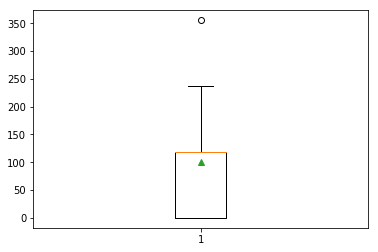

In [4]:
best=BEST_AGENTS[:,-1]
import matplotlib.pyplot as plt
plt.boxplot(best,showmeans=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f0234a5c908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0234a6b160>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7f0234a6bb38>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0234a6b7f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0234a5ca58>,
  <matplotlib.lines.Line2D at 0x7f0234a5cdd8>]}

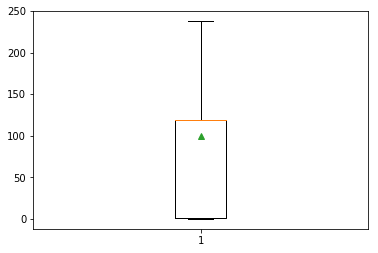

In [5]:
plt.boxplot(best,showmeans=True,sym='')